In [54]:
# Matt Caraher
# Project 7
# Intro to Data Science
# 5/1/2022


In [55]:
# Load in dermatology.csv

import pandas as pd

derm_data = pd.read_csv("https://raw.githubusercontent.com/mattcar265/IDS/main/Project%207/dermatology.csv")

derm_data.head()


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [56]:
# Check for missing values

derm_data.isnull().sum()


erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [57]:
# Input average age for missing ages

import numpy as np
import math

# Find average age and store as integer
ageMean = math.trunc(np.nanmean(derm_data['age']))

derm_data['age'] = derm_data['age'].fillna(ageMean)


In [58]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Disease and Age')

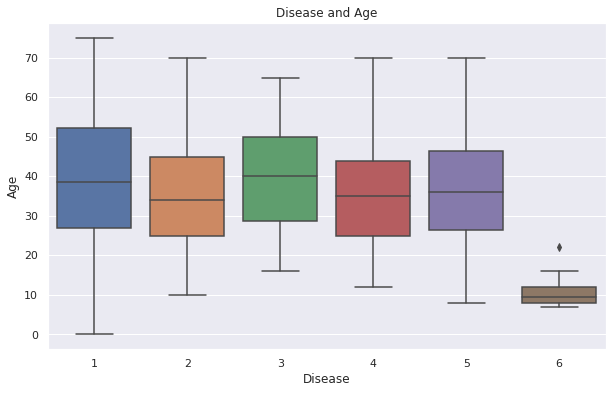

In [59]:
# Create plot of age and disease

import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# create another grouped boxplot 
plt.figure(figsize=(10,6))

fig = sns.boxplot(x = derm_data['class'],
            y = derm_data['age'])

plt.xlabel("Disease")
plt.ylabel("Age")
plt.title("Disease and Age")

# Age is a great indicator of disease because it shows us what the average age is
# that an individual will get a disease. However, with the 6 diseases in this dataset, the
# majority of them do not vary greatly in these plots. They could be useful in
# identifying the specifics of when one should worry about said disease, the youngest/
# oldest recorded case of said disease, etc.


In [60]:
# Array of cross tabulations of disease compared to all ordinal attributes

# Initialize array
crosstabs = [0 for i in range(derm_data.shape[1]-2)] 

# Fill with contingency tables
for i in range(0,derm_data.shape[1]-2):
  crosstabs[i] = pd.crosstab(derm_data['class'], derm_data.iloc[:, i])


In [61]:
# Print the contingency tables

for i in range(0,derm_data.shape[1]-2):
  print(crosstabs[i])


erythema  0   1   2   3
class                  
1         1   7  63  41
2         0   5  34  22
3         1   7  49  15
4         0  11  32   6
5         2  25  22   3
6         0   2  15   3
scaling  0   1   2   3
class                 
1        0  13  64  35
2        0   7  43  11
3        2  28  37   5
4        0  24  25   0
5        6  34  11   1
6        0   5  15   0
definite_borders   0   1   2   3
class                           
1                  0  14  73  25
2                 21  22  18   0
3                  1  10  42  19
4                  9  22  18   0
5                 23  16  11   2
6                  5   9   6   0
itching   0   1   2   3
class                  
1        55  22  21  14
2         9  16  25  11
3         2   9  28  33
4        33  10   5   1
5         8   7  20  17
6        11   8   1   0
koebner_phenomenon   0   1   2   3
class                             
1                   63  27  18   4
2                   60   0   1   0
3                   20  18  

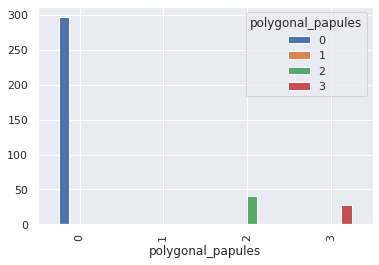

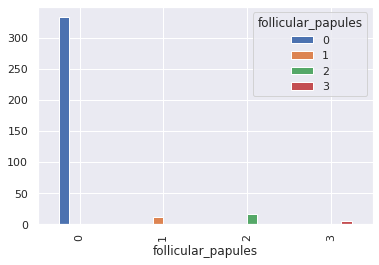

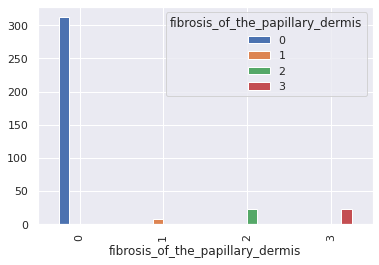

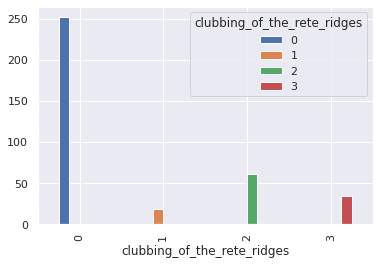

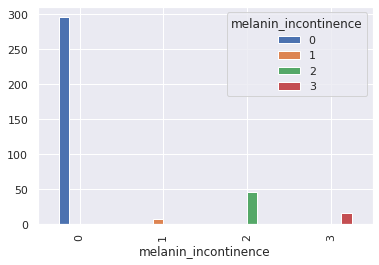

In [62]:
# Plot of the charts most useful at signifying a specific disease.
import matplotlib.pyplot as plt

pd.crosstab(derm_data['polygonal_papules'], derm_data.iloc[:, 5]).plot(kind="bar", stacked=False)
pd.crosstab(derm_data['follicular_papules'], derm_data.iloc[:, 6]).plot(kind="bar", stacked=False)
pd.crosstab(derm_data['fibrosis_of_the_papillary_dermis'], derm_data.iloc[:, 14]).plot(kind="bar", stacked=False)
pd.crosstab(derm_data['clubbing_of_the_rete_ridges'], derm_data.iloc[:, 19]).plot(kind="bar", stacked=False)
pd.crosstab(derm_data['melanin_incontinence'], derm_data.iloc[:, 11]).plot(kind="bar", stacked=False)


In [63]:
# Create column Disease_1, 1 if class=1 and 0 if class=0

derm_data['disease_1'] = np.where(derm_data['class']==1, 1, 0)
derm_data.head()


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class,disease_1
0,2,2,0,3,0,0,0,0,1,0,...,0,3,0,0,0,1,0,55.0,2,0
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,1,0,8.0,1,1
2,2,1,2,3,1,3,0,3,0,0,...,2,3,2,0,0,2,3,26.0,3,0
3,2,2,2,0,0,0,0,0,3,2,...,0,0,0,0,0,3,0,40.0,1,1
4,2,3,2,2,2,2,0,2,0,0,...,3,2,3,0,0,2,3,45.0,3,0


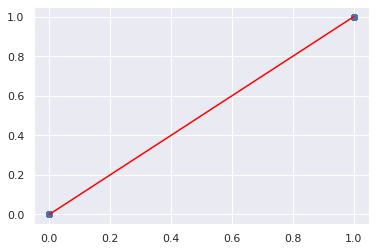

In [64]:
# Linear regression model for disease_1 vs. age

from sklearn.linear_model import LinearRegression

# Save all the rows of age column in X
X = pd.get_dummies(data=derm_data[['disease_1']], drop_first=True)

# Save all the rows of disease_1 column in Y
Y = derm_data.iloc[:, 35].values.reshape(-1,1)

# Create model
LRmodel = LinearRegression()  

# Linear regression
LRmodel.fit(X, Y)   

# Make predictions
Y_pred = LRmodel.predict(X)  

# Visualize the dataset and the regression line:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.show()


In [65]:
# Generating Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#Create a Gaussian Classifier
NBmodel = GaussianNB()

# Prepare input and output
X = derm_data[['polygonal_papules','follicular_papules','fibrosis_of_the_papillary_dermis','clubbing_of_the_rete_ridges','melanin_incontinence']].copy()
y = derm_data.iloc[:,35]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.50, stratify=y)

# Confusion matrices
print(X_train)
print(X_test)


     polygonal_papules  follicular_papules  fibrosis_of_the_papillary_dermis  \
89                   0                   0                                 0   
38                   1                   0                                 0   
4                    2                   0                                 0   
101                  0                   0                                 3   
107                  0                   0                                 0   
..                 ...                 ...                               ...   
215                  2                   0                                 0   
330                  0                   0                                 0   
360                  0                   0                                 0   
147                  0                   0                                 2   
195                  0                   0                                 0   

     clubbing_of_the_rete_ridges  melan

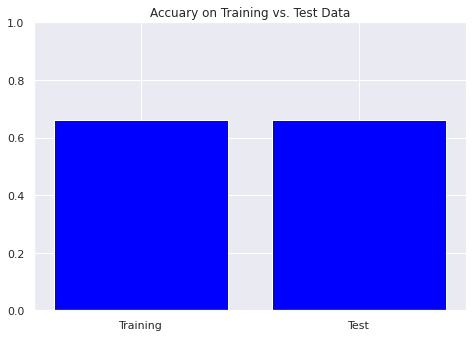

In [66]:
import matplotlib.pyplot as plt

# Train model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot of accuracy
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="blue")
ax.set_ylim(0, 1)
plt.show()


In [67]:
# Prepping for the CART model of all vs. disease 

from sklearn.model_selection import train_test_split

# Prepare X and y
X = derm_data[derm_data.columns[0:33]]
y = derm_data['class']


# Set train/test split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)
    

|--- clubbing_of_the_rete_ridges <= 0.50
|   |--- vacuolisation_and_damage_of_basal_layer <= 0.50
|   |   |--- fibrosis_of_the_papillary_dermis <= 0.50
|   |   |   |--- koebner_phenomenon <= 0.50
|   |   |   |   |--- class: 2
|   |   |   |--- koebner_phenomenon >  0.50
|   |   |   |   |--- class: 4
|   |   |--- fibrosis_of_the_papillary_dermis >  0.50
|   |   |   |--- class: 5
|   |--- vacuolisation_and_damage_of_basal_layer >  0.50
|   |   |--- class: 3
|--- clubbing_of_the_rete_ridges >  0.50
|   |--- class: 1



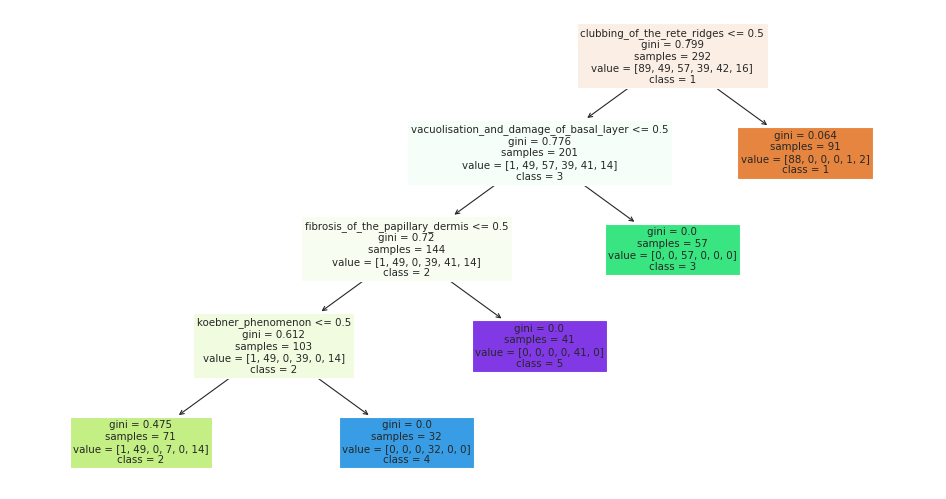

In [68]:
# A decision tree CART (gini) model for the entire feature space vs. the disease column

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Create CART model
cart = DecisionTreeClassifier(criterion = "gini", 
                                         max_leaf_nodes=5,
                                         random_state = 120).fit(X_train, y_train)

# Control the figure size
from matplotlib.pyplot import figure
figure(figsize=(15, 8), dpi=80)


# Plot the tree
cn = ['1', '2', '3', '4', '5', '6']
tree.plot_tree(cart, feature_names=X.columns.values.tolist(), 
                                class_names=cn,
                                filled = True)

# Print the text version of the tree
text = tree.export_text(cart, 
                                       feature_names=X.columns.values.tolist())
print(text)


In [69]:
# Record CART's classification accuracy on tarining and test datasets
score1 = round(cart.score(X_train, y_train), 2) # training score
score2 = round(cart.score(X_test, y_test), 2)   # testing score

print ("CART Training and Testing scores: %.2f, %.2f" %  (score1, score2))


CART Training and Testing scores: 0.91, 0.84


In [70]:
from sklearn.metrics import confusion_matrix

# Record CART predictions
cart_predictions = cart.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_true=y_test, 
                           y_pred = cart_predictions)

# Print confusion matrix
print(cm)


[[21  2  0  0  0  0]
 [ 0 11  0  1  0  0]
 [ 0  0 14  0  1  0]
 [ 0  2  0  8  0  0]
 [ 2  0  0  0  8  0]
 [ 0  4  0  0  0  0]]


In [71]:
print(X.shape, y.shape)


# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# Source: https://machinelearningmastery.com/random-forest-ensemble-in-python/


(366, 33) (366,)
Accuracy: 0.978 (0.023)


Elapsed time to compute the importances: 0.011 seconds


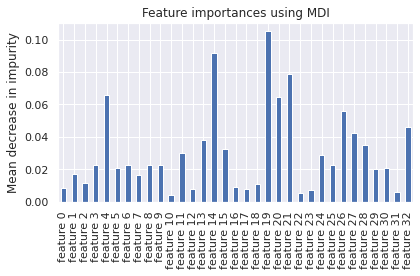

In [72]:
# Plot the importances

import time
model.fit(X, y)

start_time = time.time()

feature_names = [f"feature {i}" for i in range(X.shape[1])]

importances = model.feature_importances_

std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

model_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
model_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()                      

# Source: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html


In [73]:
# According to the feature importance plot, feature 19 is the most important feature. 
# This is the same finding I had with the confusion matrices above, which
# includes clubbing_of_the_rete_ridges (19). The random forest model had a
# very high accuracy rate of 0.975 during my test run. In terms of visualizing the
# data, the feature importances model was the most useful. The confusion matrices
# were most useful for understanding the impact of each feature vs. different
# diseases.
